<a href="https://colab.research.google.com/github/RELEBOHILE-PHEKO/Healthcare_Predictor/blob/main/Multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import warnings
warnings.filterwarnings('ignore')

# Load the data (assuming your CSV file is named 'lesotho_healthcare_data.csv')
# df = pd.read_csv('https://github.com/RELEBOHILE-PHEKO/Healthcare_Predictor/blob/main/lesotho_healthcare_costs.csv')

In [19]:
# Create data similar to the Lesotho healthcare dataset
np.random.seed(42)
n_samples = 500

data = {
    'age': np.random.randint(18, 80, n_samples),
    'sex': np.random.choice(['male', 'female'], n_samples),
    'region': np.random.choice(['Quthing', 'Thaba-Tseka', 'Butha-Buthe', 'Mafeteng', 'Mohale\'s Hoek', 'Qacha\'s Nek', 'Leribe', 'Maseru'], n_samples),
    'is_insured': np.random.choice([0, 1], n_samples),
    'employment': np.random.choice(['employed', 'unemployed', 'self-employed'], n_samples),
    'household_size': np.random.randint(1, 10, n_samples),
    'primary_healthcare_access': np.random.choice(['easy', 'moderate', 'difficult'], n_samples),
    'annual_income': np.random.uniform(10000, 100000, n_samples),
    'healthcare_type': np.random.choice(['public', 'private'], n_samples)}

In [20]:

# Generate healthcare cost based on features (realistic relationships)
healthcare_costs = []
for i in range(n_samples):
    base_cost = 500

    # Age factor (older = more expensive)
    age_factor = data['age'][i] * 10

    # Insurance factor (insured = lower cost)
    insurance_factor = -2000 if data['is_insured'][i] == 1 else 1000

    # Healthcare type factor (private = more expensive)
    type_factor = 2000 if data['healthcare_type'][i] == 'private' else 0

    # Income factor (higher income = willing to pay more for private care)
    income_factor = data['annual_income'][i] * 0.05

    # Access factor (difficult access = higher emergency costs)
    access_factor = 1500 if data['primary_healthcare_access'][i] == 'difficult' else 0

    # Household size factor (larger household = budget constraints)
    household_factor = -100 * data['household_size'][i]

    cost = base_cost + age_factor + insurance_factor + type_factor + income_factor * 0.1 + access_factor + household_factor
    cost = max(100, cost)  # Minimum cost
    healthcare_costs.append(cost + np.random.normal(0, 200))  # Add noise

data['healthcare_cost'] = healthcare_costs
df = pd.DataFrame(data)

print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())


Dataset Shape: (500, 10)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        500 non-null    int64  
 1   sex                        500 non-null    object 
 2   region                     500 non-null    object 
 3   is_insured                 500 non-null    int64  
 4   employment                 500 non-null    object 
 5   household_size             500 non-null    int64  
 6   primary_healthcare_access  500 non-null    object 
 7   annual_income              500 non-null    float64
 8   healthcare_type            500 non-null    object 
 9   healthcare_cost            500 non-null    float64
dtypes: float64(2), int64(3), object(5)
memory usage: 39.2+ KB
None

First 5 rows:
   age     sex       region  is_insured     employment  household_size  \
0   56  female  Thaba-Tsek

In [16]:
# Data Analysis and Visualization
print("\n=== DATA ANALYSIS ===")
print("\nDescriptive Statistics:")
print(df.describe())




=== DATA ANALYSIS ===

Descriptive Statistics:
              age  is_insured  household_size  annual_income  healthcare_cost
count  500.000000  500.000000      500.000000     500.000000       500.000000
mean    49.910000    0.476000        4.880000   54750.523785      2047.788980
std     18.221909    0.499924        2.516797   25830.313393      1674.702603
min     18.000000    0.000000        1.000000   10012.122370      -343.860075
25%     35.000000    0.000000        3.000000   34846.215439       537.360008
50%     50.000000    0.000000        5.000000   54879.386090      1760.866573
75%     66.000000    1.000000        7.000000   76652.480170      3496.072926
max     79.000000    1.000000        9.000000   99803.877011      6169.307680


In [17]:

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
age                          0
sex                          0
region                       0
is_insured                   0
employment                   0
household_size               0
primary_healthcare_access    0
annual_income                0
healthcare_type              0
healthcare_cost              0
dtype: int64


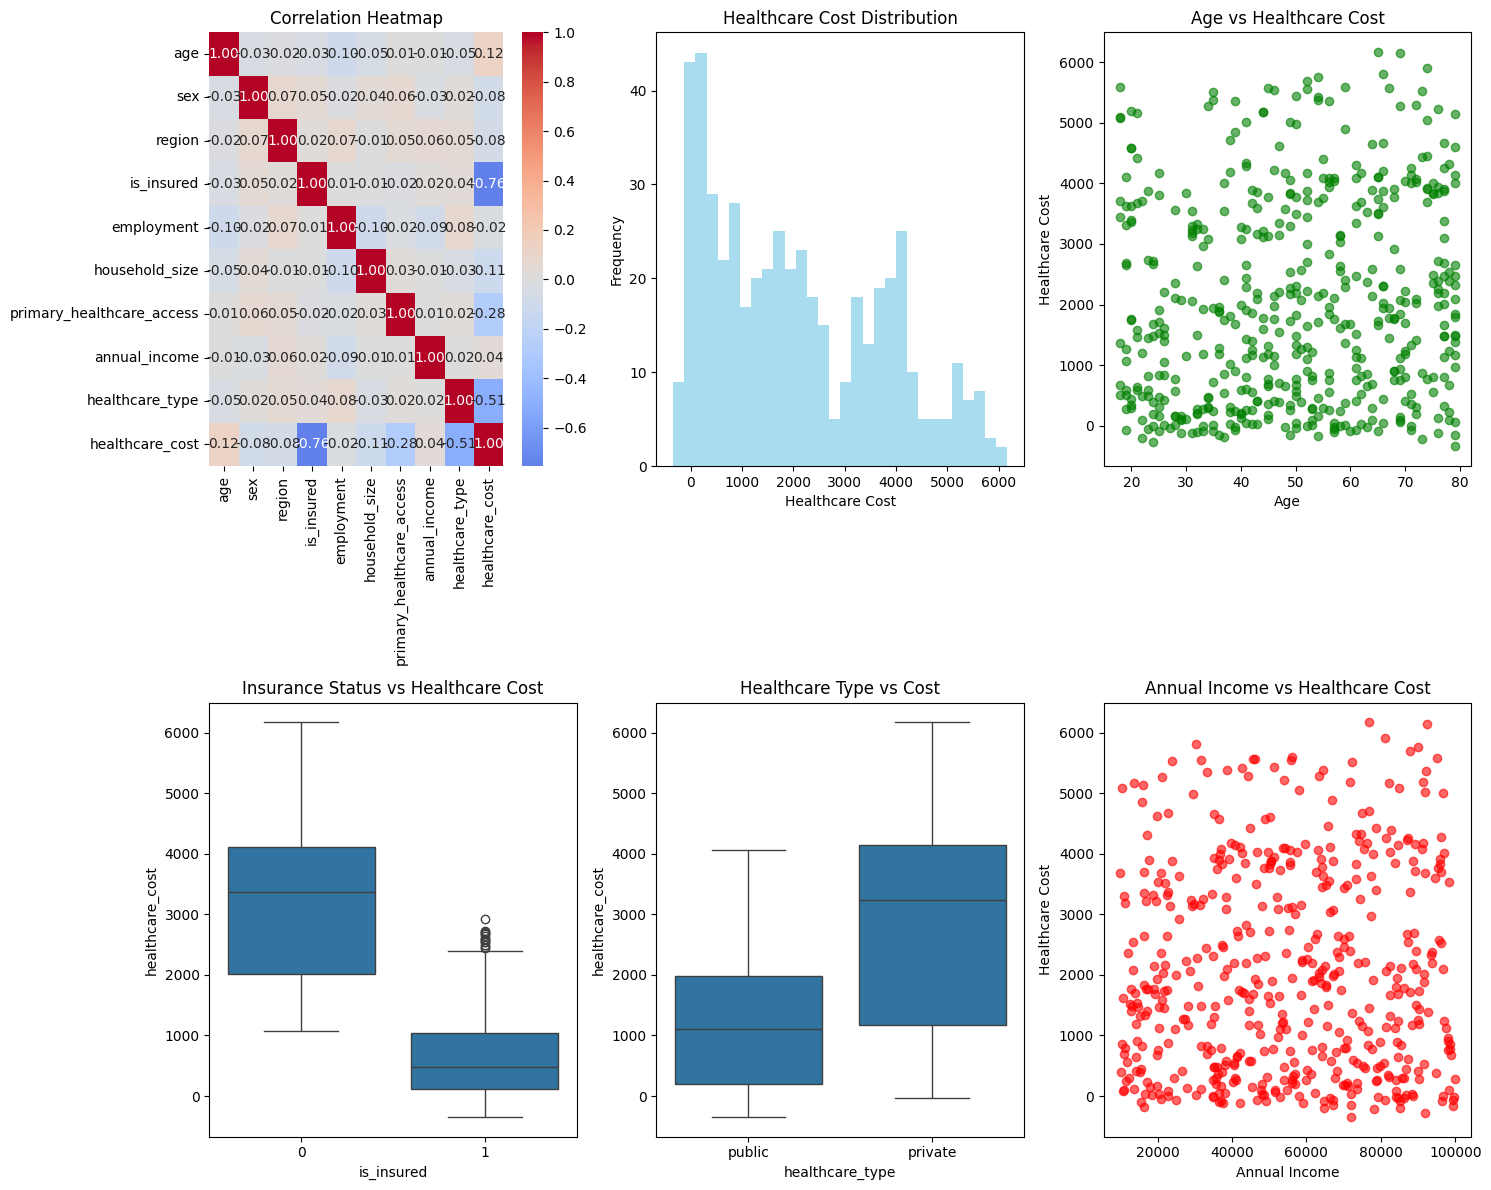

In [8]:
# Visualizations
plt.figure(figsize=(15, 12))

# 1. Correlation heatmap
plt.subplot(2, 3, 1)
# Convert categorical variables to numeric for correlation
df_numeric = df.copy()
le = LabelEncoder()
categorical_cols = ['sex', 'region', 'employment', 'primary_healthcare_access', 'healthcare_type']
for col in categorical_cols:
    df_numeric[col] = le.fit_transform(df_numeric[col])

correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()

# 2. Healthcare cost distribution
plt.subplot(2, 3, 2)
plt.hist(df['healthcare_cost'], bins=30, alpha=0.7, color='skyblue')
plt.xlabel('Healthcare Cost')
plt.ylabel('Frequency')
plt.title('Healthcare Cost Distribution')

# 3. Age vs Healthcare Cost
plt.subplot(2, 3, 3)
plt.scatter(df['age'], df['healthcare_cost'], alpha=0.6, color='green')
plt.xlabel('Age')
plt.ylabel('Healthcare Cost')
plt.title('Age vs Healthcare Cost')

# 4. Insurance vs Healthcare Cost
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='is_insured', y='healthcare_cost')
plt.title('Insurance Status vs Healthcare Cost')

# 5. Healthcare Type vs Cost
plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='healthcare_type', y='healthcare_cost')
plt.title('Healthcare Type vs Cost')

# 6. Income vs Healthcare Cost
plt.subplot(2, 3, 6)
plt.scatter(df['annual_income'], df['healthcare_cost'], alpha=0.6, color='red')
plt.xlabel('Annual Income')
plt.ylabel('Healthcare Cost')
plt.title('Annual Income vs Healthcare Cost')

plt.tight_layout()
plt.show()

In [9]:
print("\n=== FEATURE ENGINEERING ===")


 # Prepare features for modeling
X = df.drop('healthcare_cost', axis=1)
y = df['healthcare_cost']

# Encode categorical variables
categorical_columns = ['sex', 'region', 'employment', 'primary_healthcare_access', 'healthcare_type']
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

print("Features after encoding:", X_encoded.columns.tolist())
print("Feature matrix shape:", X_encoded.shape)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)




=== FEATURE ENGINEERING ===
Features after encoding: ['age', 'is_insured', 'household_size', 'annual_income', 'sex_male', 'region_Leribe', 'region_Mafeteng', 'region_Maseru', "region_Mohale's Hoek", "region_Qacha's Nek", 'region_Quthing', 'region_Thaba-Tseka', 'employment_self-employed', 'employment_unemployed', 'primary_healthcare_access_easy', 'primary_healthcare_access_moderate', 'healthcare_type_public']
Feature matrix shape: (500, 17)
Training set shape: (400, 17)
Test set shape: (100, 17)


In [10]:
print("\n=== MODEL TRAINING ===")
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

model_results = {}
trained_models = {}

# Train and evaluate models
for name, model in models.items():
    print(f"\nTraining {name}...")

    if name == 'Linear Regression':
        model.fit(X_train_scaled, y_train)
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    model_results[name] = {
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'test_mae': test_mae
    }

    trained_models[name] = model

    print(f"{name} Results:")
    print(f"  Train MSE: {train_mse:.2f}")
    print(f"  Test MSE: {test_mse:.2f}")
    print(f"  Train R²: {train_r2:.4f}")
    print(f"  Test R²: {test_r2:.4f}")
    print(f"  Test MAE: {test_mae:.2f}")

# Find best model
best_model_name = min(model_results.keys(), key=lambda x: model_results[x]['test_mse'])
best_model = trained_models[best_model_name]


print(f"\n=== BEST MODEL: {best_model_name} ===")
print(f"Test MSE: {model_results[best_model_name]['test_mse']:.2f}")
print(f"Test R²: {model_results[best_model_name]['test_r2']:.4f}")


=== MODEL TRAINING ===

Training Linear Regression...
Linear Regression Results:
  Train MSE: 153649.29
  Test MSE: 218304.28
  Train R²: 0.9447
  Test R²: 0.9224
  Test MAE: 371.04

Training Decision Tree...
Decision Tree Results:
  Train MSE: 0.00
  Test MSE: 132412.84
  Train R²: 1.0000
  Test R²: 0.9529
  Test MAE: 293.96

Training Random Forest...
Random Forest Results:
  Train MSE: 8226.05
  Test MSE: 66469.49
  Train R²: 0.9970
  Test R²: 0.9764
  Test MAE: 210.45

=== BEST MODEL: Random Forest ===
Test MSE: 66469.49
Test R²: 0.9764


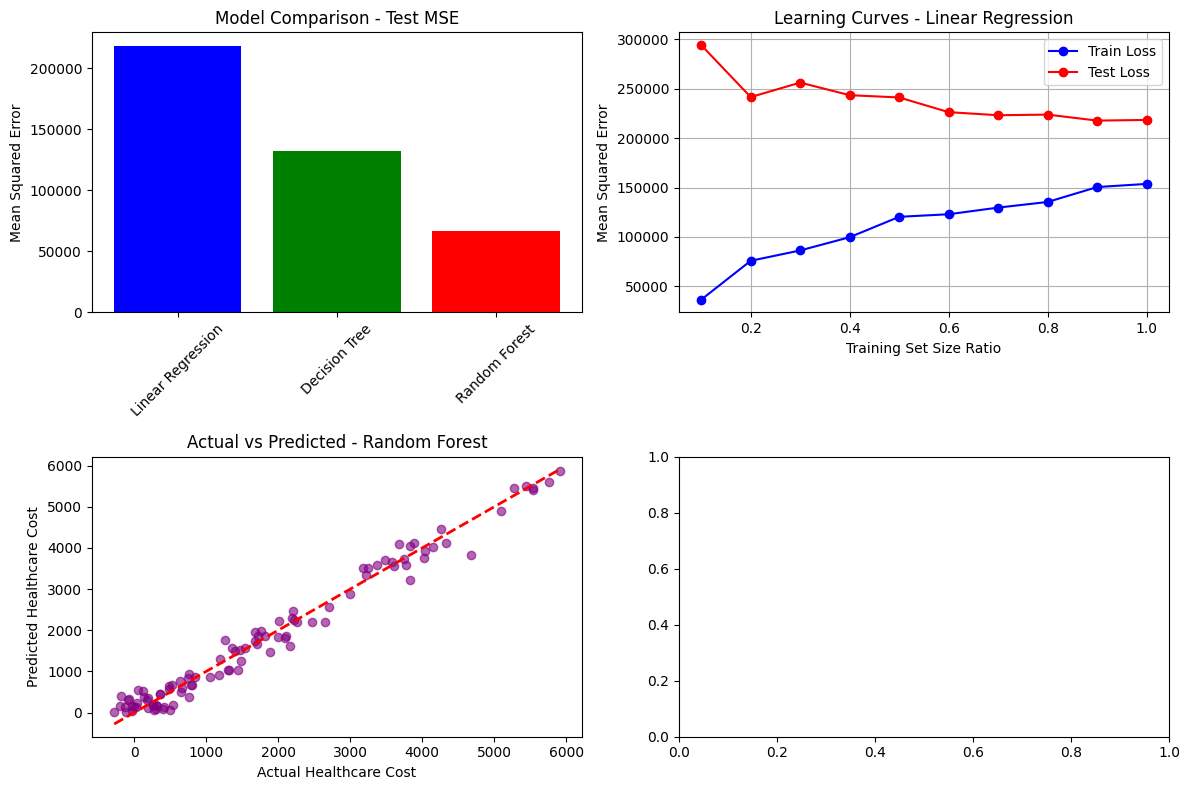

In [11]:
# Plot model comparison
plt.figure(figsize=(12, 8))

# Model comparison bar chart
plt.subplot(2, 2, 1)
model_names = list(model_results.keys())
test_mse_values = [model_results[name]['test_mse'] for name in model_names]
plt.bar(model_names, test_mse_values, color=['blue', 'green', 'red'])
plt.title('Model Comparison - Test MSE')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)

# Learning curves for Linear Regression
plt.subplot(2, 2, 2)
lr_model = trained_models['Linear Regression']
train_sizes = np.linspace(0.1, 1.0, 10)
train_losses = []
test_losses = []

for size in train_sizes:
    size_idx = int(size * len(X_train_scaled))
    lr_temp = LinearRegression()
    lr_temp.fit(X_train_scaled[:size_idx], y_train[:size_idx])

    train_pred = lr_temp.predict(X_train_scaled[:size_idx])
    test_pred = lr_temp.predict(X_test_scaled)

    train_losses.append(mean_squared_error(y_train[:size_idx], train_pred))
    test_losses.append(mean_squared_error(y_test, test_pred))

plt.plot(train_sizes, train_losses, 'o-', color='blue', label='Train Loss')
plt.plot(train_sizes, test_losses, 'o-', color='red', label='Test Loss')
plt.xlabel('Training Set Size Ratio')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curves - Linear Regression')
plt.legend()
plt.grid(True)

# Scatter plot of actual vs predicted
plt.subplot(2, 2, 3)
if best_model_name == 'Linear Regression':
    y_pred_best = best_model.predict(X_test_scaled)
else:
    y_pred_best = best_model.predict(X_test)

plt.scatter(y_test, y_pred_best, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Healthcare Cost')
plt.ylabel('Predicted Healthcare Cost')
plt.title(f'Actual vs Predicted - {best_model_name}')

# Linear regression line plot (for 2D visualization with age)
plt.subplot(2, 2, 4)
if best_model_name == 'Linear Regression':
    # Simple linear regression with age only for visualization
    lr_simple = LinearRegression()
    age_index = list(X_encoded.columns).index('age')
    lr_simple.fit(X_train_scaled[:, age_index].reshape(-1, 1), y_train)

    age_range = np.linspace(X_train['age'].min(), X_train['age'].max(), 100)
    age_range_scaled = scaler.transform(np.column_stack([age_range] + [np.mean(X_train.iloc[:, i]) for i in range(1, X_train.shape[1])]))[:, age_index]
    y_pred_line = lr_simple.predict(age_range_scaled.reshape(-1, 1))

    plt.scatter(X_test['age'], y_test, alpha=0.6, color='blue', label='Actual')
    plt.plot(age_range, y_pred_line, color='red', linewidth=2, label='Regression Line')
    plt.xlabel('Age')
    plt.ylabel('Healthcare Cost')
    plt.title('Linear Regression Line - Age vs Cost')
    plt.legend()

plt.tight_layout()
plt.show()


In [13]:
# Save the best model and preprocessing components
print(f"\n=== SAVING MODELS ===")
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Save feature names for API
feature_names = X_encoded.columns.tolist()
joblib.dump(feature_names, 'feature_names.pkl')

print(f"Best model ({best_model_name}) saved as 'best_model.pkl'")
print("Scaler saved as 'scaler.pkl'")
print("Feature names saved as 'feature_names.pkl'")



=== SAVING MODELS ===
Best model (Random Forest) saved as 'best_model.pkl'
Scaler saved as 'scaler.pkl'
Feature names saved as 'feature_names.pkl'


In [14]:
# Test prediction on a single data point
print("\n=== SINGLE PREDICTION TEST ===")
test_index = 0
single_test_sample = X_test.iloc[[test_index]]
actual_cost = y_test.iloc[test_index]

print("Test sample features:")
print(single_test_sample.to_dict('records')[0])

if best_model_name == 'Linear Regression':
    single_test_scaled = scaler.transform(single_test_sample)
    predicted_cost = best_model.predict(single_test_scaled)[0]
else:
    predicted_cost = best_model.predict(single_test_sample)[0]

print(f"\nActual cost: LSL{actual_cost:.2f}")
print(f"Predicted cost: LSL{predicted_cost:.2f}")
print(f"Error: LSL{abs(actual_cost - predicted_cost):.2f}")


=== SINGLE PREDICTION TEST ===
Test sample features:
{'age': 74, 'is_insured': 0, 'household_size': 2, 'annual_income': 81145.88148473964, 'sex_male': False, 'region_Leribe': False, 'region_Mafeteng': True, 'region_Maseru': False, "region_Mohale's Hoek": False, "region_Qacha's Nek": False, 'region_Quthing': False, 'region_Thaba-Tseka': False, 'employment_self-employed': False, 'employment_unemployed': False, 'primary_healthcare_access_easy': False, 'primary_healthcare_access_moderate': False, 'healthcare_type_public': False}

Actual cost: LSL5908.82
Predicted cost: LSL5870.80
Error: LSL38.03


In [15]:
# Create prediction function for API
def make_prediction(age, sex, region, is_insured, employment, household_size,
                   primary_healthcare_access, annual_income, healthcare_type):
    """
    Make a prediction using the trained model
    """
    # Create input dataframe
    input_data = pd.DataFrame({
        'age': [age],
        'sex': [sex],
        'region': [region],
        'is_insured': [is_insured],
        'employment': [employment],
        'household_size': [household_size],
        'primary_healthcare_access': [primary_healthcare_access],
        'annual_income': [annual_income],
        'healthcare_type': [healthcare_type]
    })

    # Apply same encoding as training data
    categorical_columns = ['sex', 'region', 'employment', 'primary_healthcare_access', 'healthcare_type']
    input_encoded = pd.get_dummies(input_data, columns=categorical_columns, drop_first=True)

    # Ensure all columns are present (reindex with training columns)
    input_encoded = input_encoded.reindex(columns=feature_names, fill_value=0)

    if best_model_name == 'Linear Regression':
        input_scaled = scaler.transform(input_encoded)
        prediction = best_model.predict(input_scaled)[0]
    else:
        prediction = best_model.predict(input_encoded)[0]

    return prediction

# Test the prediction function
print("\n=== TESTING PREDICTION FUNCTION ===")
test_prediction = make_prediction(
    age=45,
    sex='male',
    region='Maseru',
    is_insured=1,
    employment='employed',
    household_size=4,
    primary_healthcare_access='easy',
    annual_income=50000,
    healthcare_type='private'
)

print(f"Test prediction for 45-year-old insured male in Maseru: LSL{test_prediction:.2f}")

print("\n=== MODEL ANALYSIS COMPLETE ===")
print("Files created:")
print("- best_model.pkl")
print("- scaler.pkl")
print("- feature_names.pkl")
print(f"\nBest performing model: {best_model_name}")
print("Ready for API deployment!")


=== TESTING PREDICTION FUNCTION ===
Test prediction for 45-year-old insured male in Maseru: LSL2359.03

=== MODEL ANALYSIS COMPLETE ===
Files created:
- best_model.pkl
- scaler.pkl
- feature_names.pkl

Best performing model: Random Forest
Ready for API deployment!


In [21]:
from google.colab import files
files.download("best_model.pkl")
files.download("scaler.pkl")
files.download("feature_names.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>